# Amazon Alexa Reviews Analysis

**Objective:**

**Data Description:**
      
| Variables | Description | Type |
| :- | :-: | -: |
| Rating | It is the rating given by the customer. It ranges between 1-5. | Integer |
| Date | It is the date when the reveiw was posted. | String |
| Variation | Type of the product. | String |
| Verified Reviews | Description of the review. | String |
| Feedback | Feedback recieved or not. It ranges between 0 and 1. | Integer |

## Libraries

In [593]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Data Preprocessing

Importing the data:

In [594]:
df=pd.read_csv('amazon_alexa.tsv',sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


General information about the data:

In [595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


There are no null values in the dataset.

### Feature: Rating

In [596]:
print("Types of unique values: ",df['rating'].unique())

Types of unique values:  [5 4 3 2 1]


<AxesSubplot:xlabel='rating', ylabel='Count'>

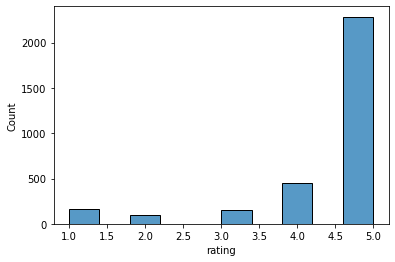

In [597]:
sns.histplot(data=df, x="rating", bins= 10)

We can clearly see that most of the reviews are in the range of 4 and 5. Its a pretty good sign and shows that product is really reliable. At the same time we cannot ignore the ratings 
below 3, as they will help us focus on weaker areas.

### Feature: Feedback

In [598]:
print("Types of unique values: ",df['feedback'].unique())

Types of unique values:  [1 0]


<AxesSubplot:xlabel='feedback', ylabel='Count'>

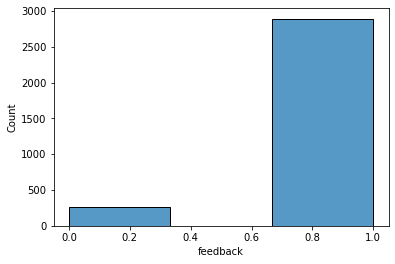

In [599]:
sns.histplot(data=df, x="feedback", bins= 3)

Most of the values lies in 1

<AxesSubplot:xlabel='rating', ylabel='Count'>

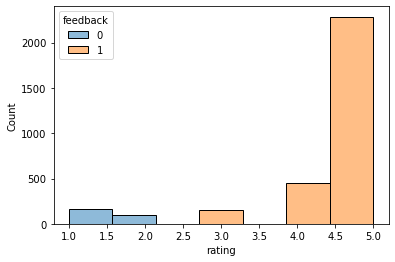

In [600]:
sns.histplot(data=df, x="rating", bins= 7, hue= "feedback")

### Feature: Variation

In [601]:
print("Types of unique values: ",df['variation'].unique())

Types of unique values:  ['Charcoal Fabric ' 'Walnut Finish ' 'Heather Gray Fabric '
 'Sandstone Fabric ' 'Oak Finish ' 'Black' 'White' 'Black  Spot'
 'White  Spot' 'Black  Show' 'White  Show' 'Black  Plus' 'White  Plus'
 'Configuration: Fire TV Stick' 'Black  Dot' 'White  Dot']


<AxesSubplot:xlabel='variation', ylabel='Count'>

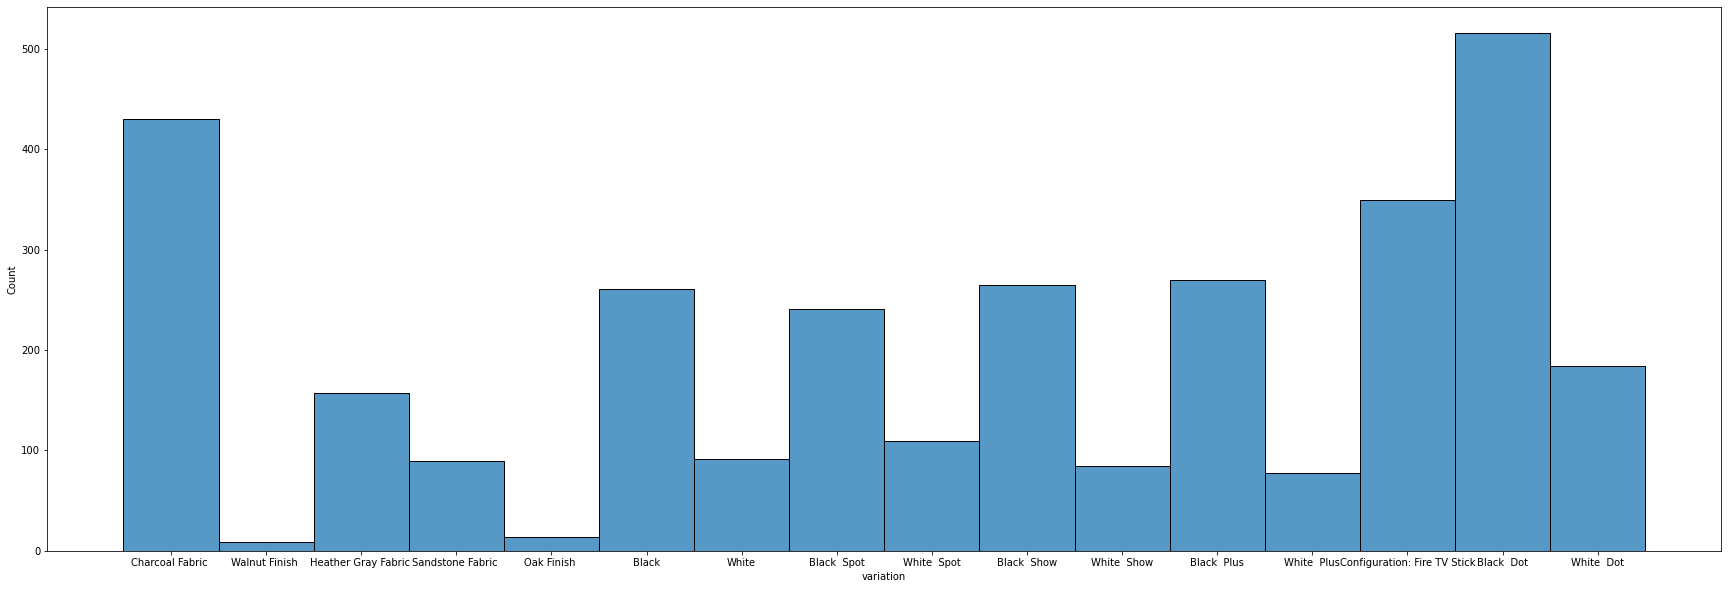

In [602]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df, x="variation", bins= 10, ax=ax)

The most reviewed models are:

    1. Black Dot
    2. Charcoal Fabric
    3. Plus Configuartion: Fire TV Stick

The fact that black dot is most review model clearly points to the marketing and adfvertising strategy, as this is the most advertised model.

The Least reviewed models are:

    1. Walnut Finish
    2. Oak Finish
    3. White

The above 3 models are of light color. The reason that are least reviewed could be because they less number of customers to prefer to buy them.

<AxesSubplot:xlabel='variation', ylabel='Count'>

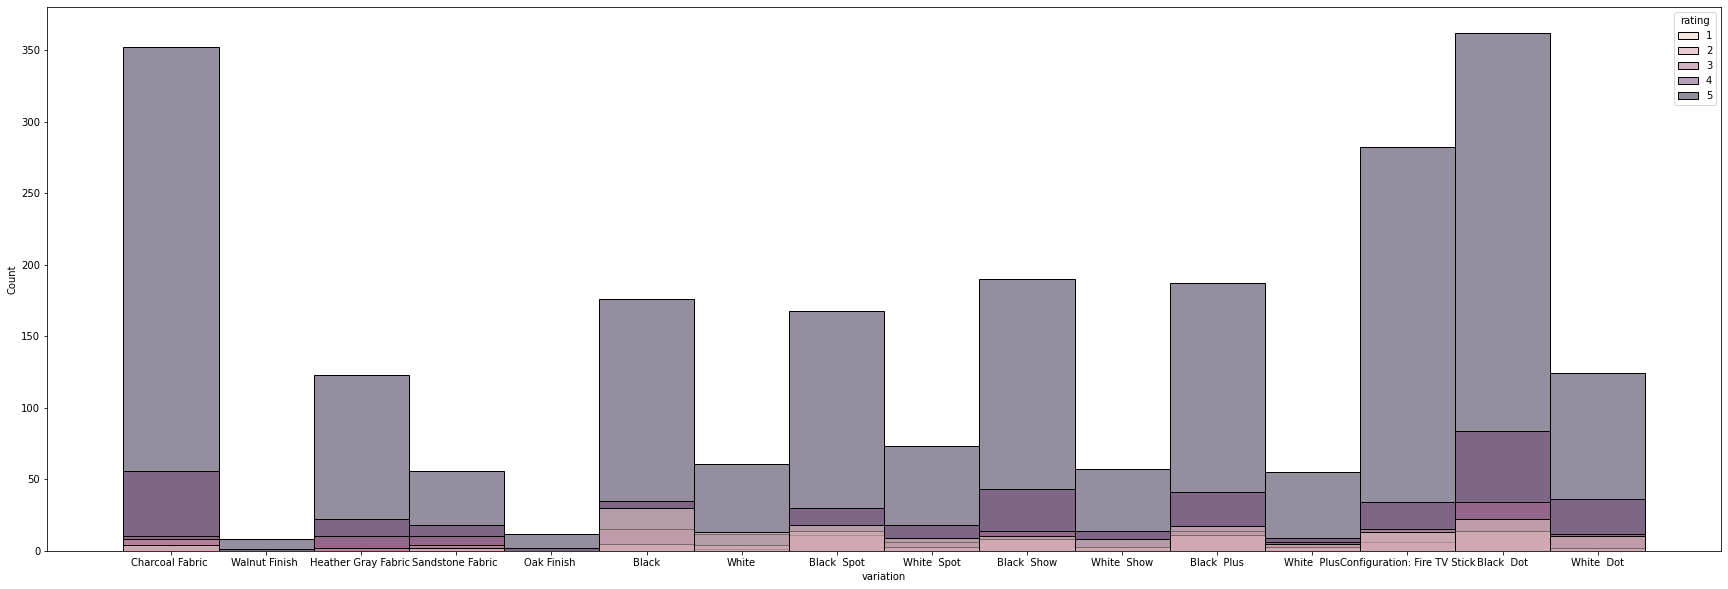

In [626]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df, x="variation", bins= 10, ax=ax, hue = 'rating')

### Feature: Date

Transforming date column.

In [604]:
cal = pd.to_datetime(df['date'], format='%d-%b-%y')

In [605]:
df["Month"] = cal.dt.month
df["Year"] = cal.dt.year
df["Day"] = cal.dt.day

In [606]:
df.head()

,rating,date,variation,verified_reviews,feedback,Month,Year,Day
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,7,2018,31
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,7,2018,31
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,7,2018,31
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1,7,2018,31
4,5,31-Jul-18,Charcoal Fabric,Music,1,7,2018,31


In [629]:
df['Year'].unique()

array([2018])

sns.histplot(data=df, x="Day", bins= 10)

<AxesSubplot:xlabel='Month', ylabel='Count'>

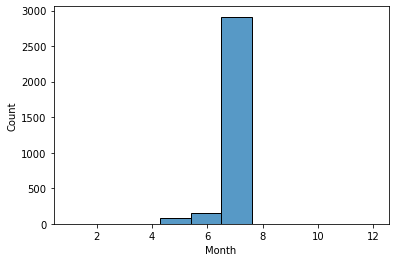

In [607]:
sns.histplot(data=df, x="Month", bins= 10, binrange=(1,12))

<AxesSubplot:xlabel='Day', ylabel='Count'>

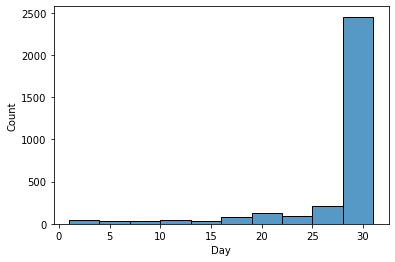

In [635]:
sns.histplot(data=df, x="Day", bins= 10, binrange=(1,31))

In [ ]:
From the data we can conclude following:
    
    1.

### Feature: Verified Reviews

Calculating length of verified reviews.

In [608]:
arr = []
for i in range(0,len(df['verified_reviews'])): 
    arr.append(len(df['verified_reviews'][i]))
df["Reviews Length"] = arr  

In [609]:
df.head()

,rating,date,variation,verified_reviews,feedback,Month,Year,Day,Reviews Length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,7,2018,31,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,7,2018,31,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,7,2018,31,195
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1,7,2018,31,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,7,2018,31,5


<AxesSubplot:xlabel='Reviews Length', ylabel='Count'>

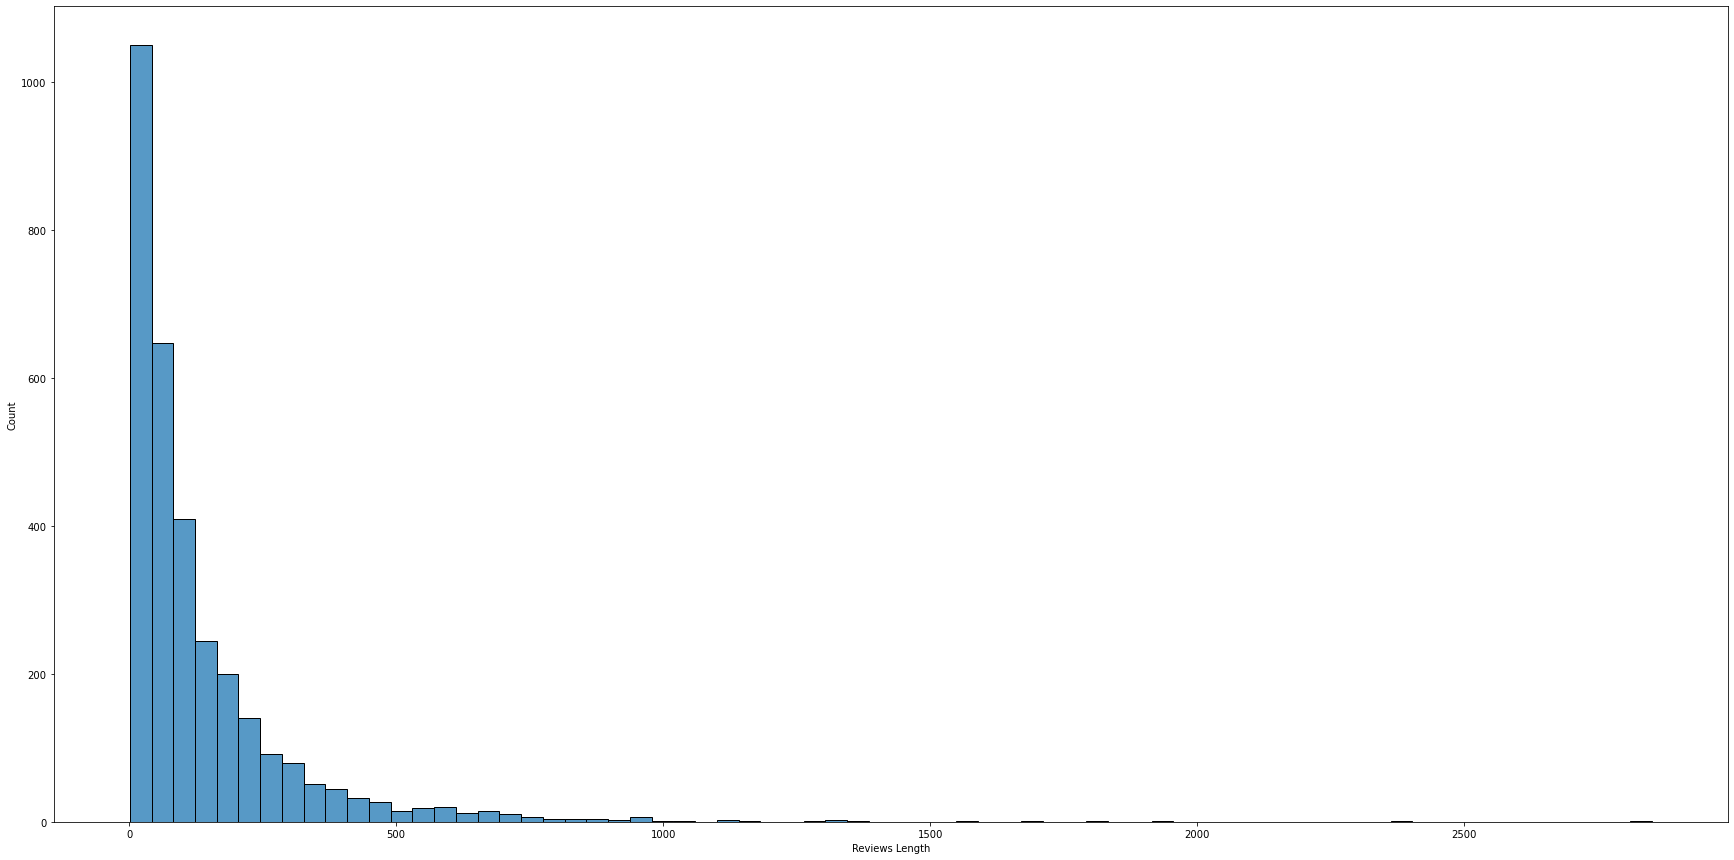

In [610]:
fig_dims = (30, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df, x="Reviews Length", bins= 70, ax = ax)

<AxesSubplot:xlabel='Reviews Length', ylabel='Count'>

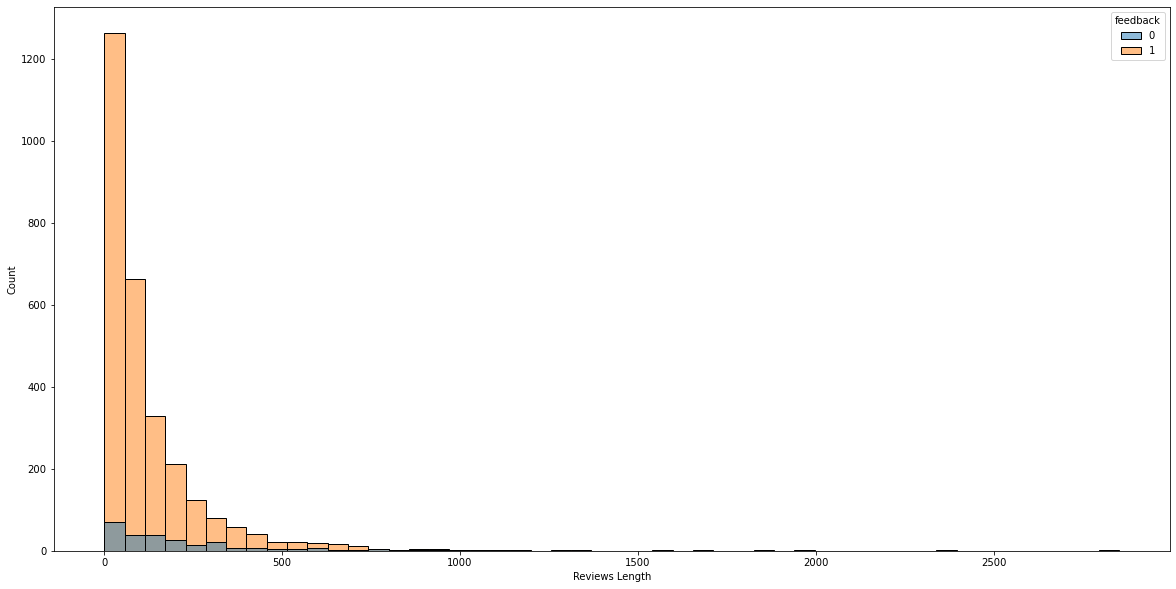

In [611]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df, x="Reviews Length", bins= 50, ax = ax, hue = 'feedback')

### Feature: Verified Reviews

In [424]:
import spacy
nlp = spacy.load('en_core_web_sm')
rev = ' '.join(df['verified_reviews'].tolist())
doc = nlp(rev)

In [429]:
tokens = pd.DataFrame(columns=['Token','Lemma','Stopwards'])

tok = []
lem = []
stop = [] 
for t in doc:
    tok.append(str(t))
    lem.append(t.lemma_)
    stop.append(t.is_stop)


tokens["Token"] = tok
tokens['Lemma'] = lem
tokens['Stopwards'] = stop

tokens.head()

,Token,Lemma,Stopwards
0,Love,love,False
1,my,my,True
2,Echo,Echo,False
3,!,!,False
4,Loved,love,False


In [430]:
tokens.shape

(93002, 3)

In [427]:
print("Total number of non-important words: ",tokens['Stopwards'][tokens['Stopwards']==True].count())
print("Total number of important words: ",tokens['Stopwards'][tokens['Stopwards']==False].count())

Total number of non-important words:  46591
Total number of important words:  46411


Dropping non-important words.

In [432]:
tokens = tokens.loc[tokens["Stopwards"] != True]
tokens.head()

,Token,Lemma,Stopwards
0,Love,love,False
2,Echo,Echo,False
3,!,!,False
4,Loved,love,False
6,!,!,False


In [433]:
tokens.shape

(46411, 3)

In [452]:
import re
regex = re.compile('[@_!#$%^&*()"''"<>?/\|}{~:,.;-=+<>?~`]')
temp = tokens.loc[tokens['Token'].str.contains(regex, regex=True) == False]

In [453]:
temp.shape

(36220, 3)

<AxesSubplot:xlabel='count', ylabel='Token'>

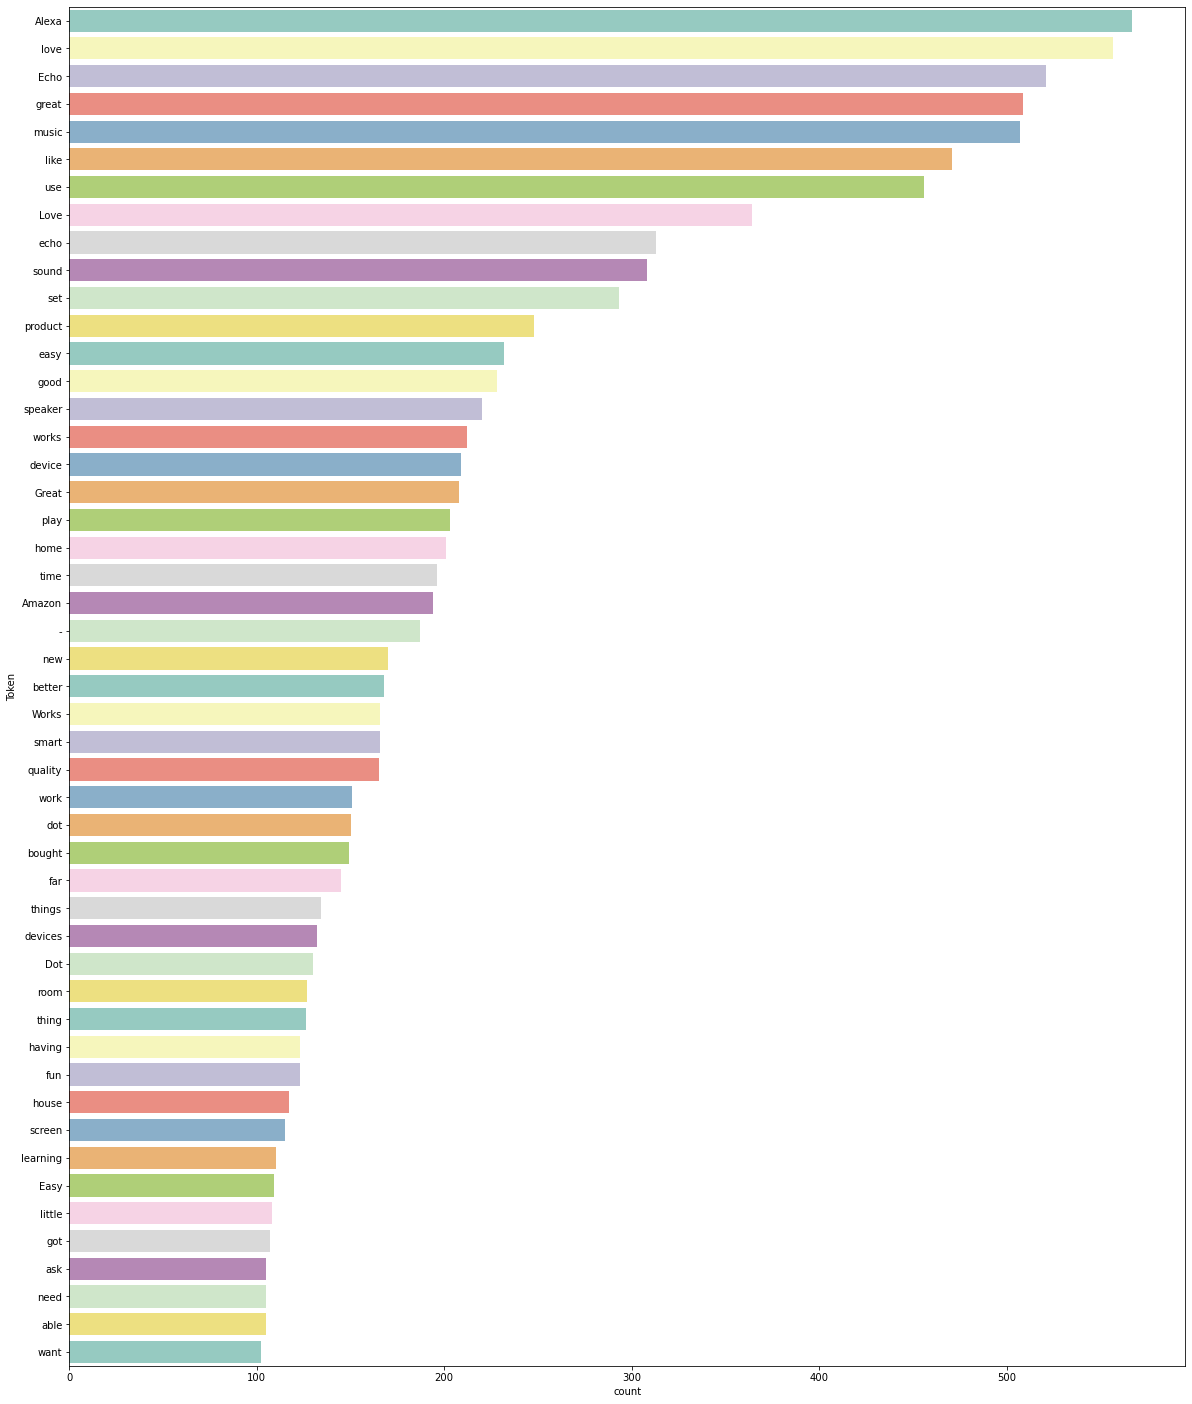

In [454]:
fig_dims = (20, 25)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=temp, y="Token", order = temp['Token'].value_counts().iloc[1:50].index, palette="Set3")

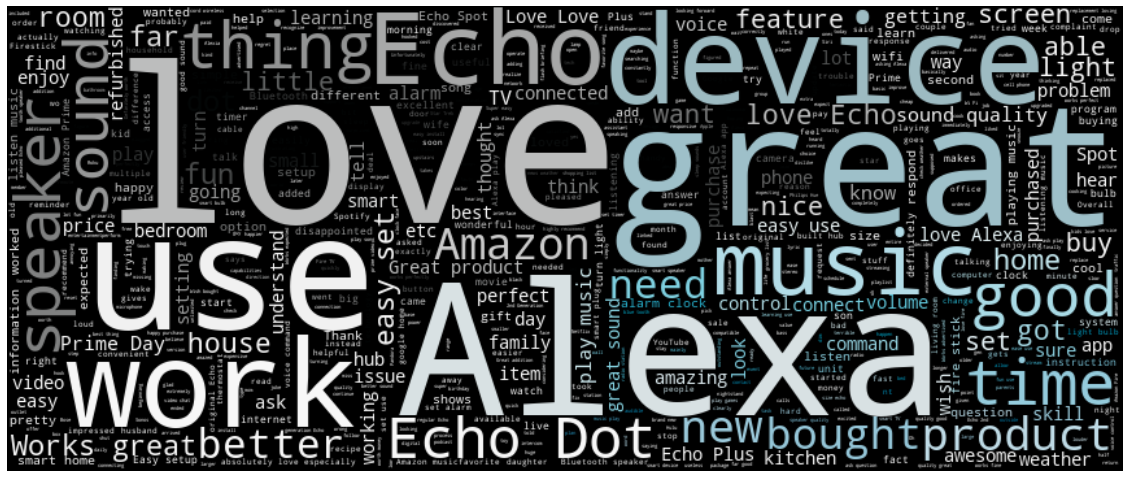

In [502]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


mask = np.array(Image.open("al.png"))
# Read the whole text.
text = ' '.join(temp['Token'].tolist())

import matplotlib.pyplot as plt


# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="black",max_words=1000, 
                      min_word_length=2, mode = "RGBA", mask = mask).generate(text)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


plt.show()

#### Low-Rated Reviews Analysis

Rating 1

In [525]:
df1 = df[df['rating'] ==1]
df1.head()

,rating,date,variation,verified_reviews,feedback,Month,Year,Day,Reviews Length
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,7,2018,30,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,7,2018,30,87
341,1,28-Jul-18,Charcoal Fabric,Alexa hardly came on..,0,7,2018,28,22
350,1,31-Jul-18,Black,Item no longer works after just 5 months of us...,0,7,2018,31,109
361,1,29-Jul-18,Black,This thing barely works. You have to select 3r...,0,7,2018,29,154


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
s = stopwords.words('english')

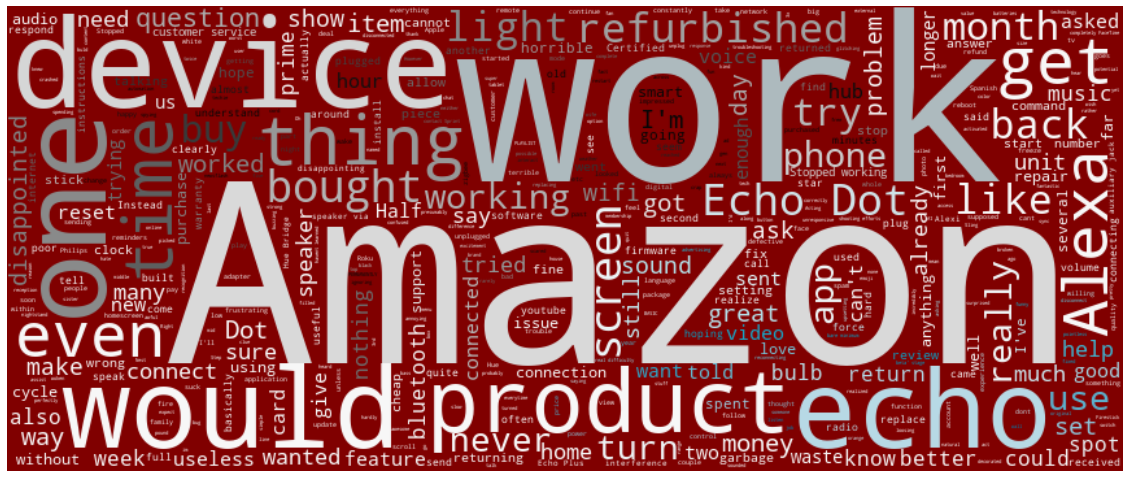

In [568]:
text = ' '.join(df1['verified_reviews'].tolist())

mask = np.array(Image.open("al.png"))
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="maroon",max_words=1000, 
                      min_word_length=2, mode = "RGBA", mask = mask,stopwords= s ).generate(text)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


plt.show()

**Reviews with common tokens and rating 1:**

**Amazon**

In [586]:
pd.set_option("display.max_colwidth", None)
df1[df1['verified_reviews'].str.contains('Amazon')][['verified_reviews', 'variation']][:3]

,verified_reviews,variation
420,Item has never worked. Out of box it is broken. Spent several days trying to get it working and running same &#34;fixes&#34; from Amazon. The only thing accomplished is I will never order another refurbished device.,Black
499,"Now I'm weary about these picking up conversations when you are not actively using them - heard about this happening on the news. I have 3-4, so this is very concerning. I wish Amazon would release something widespread or push some firmware to prevent this. If they have, I have not heard about it yet.",Black
531,"This is the worst Amazon purchase I have made. I am big Amazon fan...love the brand...unlimited digital music...prime videos...even buy my online games, music, and movies through Amazon. This app I have tried to use it make simple purchases -- to do anything. It is useless.",Black


**Screen**

In [587]:
df1[df1['verified_reviews'].str.contains('screen')][['verified_reviews', 'variation']][:3]

,verified_reviews,variation
1209,"This product currently has two related software flaws that make it completely unusable:1) There is a &#34;card&#34; on the homescreen called &#34;Things To Try&#34; -- it's an ad for other Alexa services you can try. You can turn off all the other homescreen cards, but not this one.2) By default, the homescreen cards &#34;cycle&#34; automatically, which is incredibly annoying. There is a setting where you can opt to have the cards only &#34;cycle once&#34; instead of &#34;cycle continuously&#34;, but critically *this setting does not work*. My unit has been set to &#34;cycle once&#34;, and the cards still continue to cycle all the time. Have rebooted the device, re-set, etc etc.Until these two obvious software issues are fixed, in my opinion the product is useless.",White Spot
1236,I would love this but there is no way to stop the screen from constantly scrolling through “things to try”. If Amazon would make this a setting I would change my review to 5 stars.,Black Spot
1246,"Great product and I would give 5 stars - but you can't scroll face cards without having the stupid &#34;try and ask Alexa&#34; suggestions pop up. Yes you can have it scroll once, and just stay on the clock, but I like having other cards as well. God its the worst and SO irritating. I got it super cheap, so i just face the screen toward the wall and treat it like a Dot instead of a Spot. What a dumb move on Amazons​ part.",Black Spot


**Device**

In [588]:
df1[df1['verified_reviews'].str.contains('device')][['verified_reviews', 'variation']][:3]

,verified_reviews,variation
420,Item has never worked. Out of box it is broken. Spent several days trying to get it working and running same &#34;fixes&#34; from Amazon. The only thing accomplished is I will never order another refurbished device.,Black
567,"Very bad this device, I don’t know if it’s because is refurbished or what but it activated by itself , nobody is talking and he just activated and start talking. When you talk you have to yell super lauded",White
661,This Echo Dot is horrible. The volume on my phone is louder than than this device. My boss has one at this is not the case,Black


**Echo**

In [624]:
df1[df1['verified_reviews'].str.contains('echo')][['verified_reviews', 'variation']][:3]

,verified_reviews,variation
396,"I bought an echo dot that had been refurbished but its stops whatever function its performing quite often, doesn't wake up every time, randomly turns on but does nothing. Do not buy a refurbished Echo dot.",Black
470,"This item did not work. Certified refurbished should mean it works as advertised. Instead this item crashed as soon as I turned it on and plugged it in. When trying to connect from my phone to the echo dot, it crashed, over and over. Not only would it disconnect but the orange light would freeze and then the thing would reboot with the blue light. Alexa would tell me it’s ready to connect and freeze mid sentence. Tried holding the action button for 5 seconds and it didn’t do anything. Returning immediately and hope they actually fix this item when the next buyer purchases it.",White
673,Device was not working. Followed all instructions for Alexa echo dot and it did not come on. Very upsetting.,White


Rating 2

In [612]:
df2 = df[df['rating'] ==2]
df2.head()

,rating,date,variation,verified_reviews,feedback,Month,Year,Day,Reviews Length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more accurately then Alexa. I don't see a real need for it in my household, though it was a good bargain on prime day deals.",0,7,2018,30,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get a bose,0,7,2018,30,53
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,7,2018,30,20
187,2,29-Jul-18,Charcoal Fabric,"Really disappointed Alexa has to be plug-in to wall socket all the time. My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery. If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.",0,7,2018,29,338
205,2,29-Jul-18,Sandstone Fabric,It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things,0,7,2018,29,114


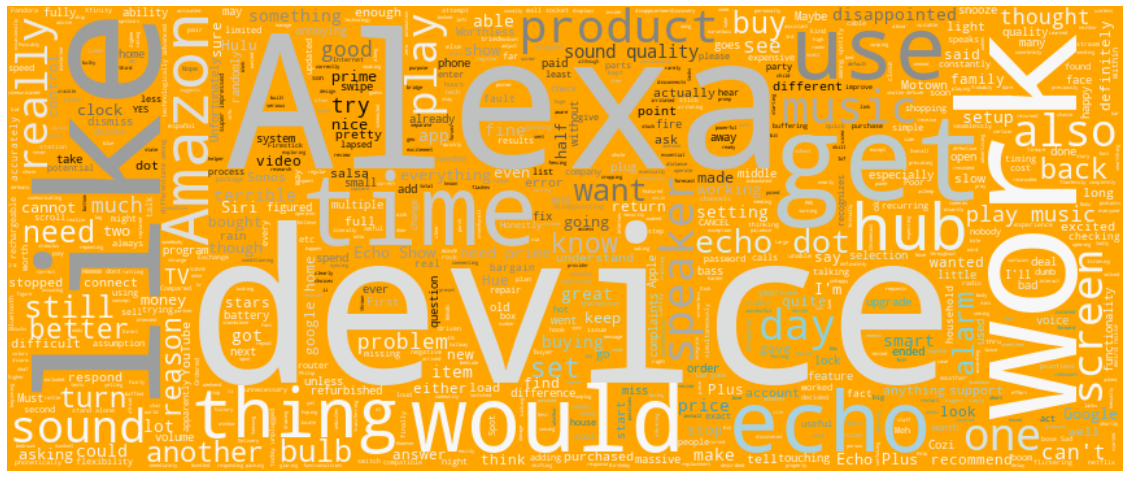

In [614]:
text = ' '.join(df2['verified_reviews'].tolist())

mask = np.array(Image.open("al.png"))
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="orange",max_words=1000, 
                      min_word_length=2, mode = "RGBA", mask = mask,stopwords= s ).generate(text)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


plt.show()

**Reviews with common tokens and rating 2:**

**Time**

In [615]:
df2[df2['verified_reviews'].str.contains('time')][['verified_reviews', 'variation']][:3]

,verified_reviews,variation
187,"Really disappointed Alexa has to be plug-in to wall socket all the time. My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery. If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.",Charcoal Fabric
205,It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things,Sandstone Fabric
394,"Initially, this echo dot worked very well. Over time, the dot stopped responding to 'alexa' unless you were within one foot of it yelling. The other echos/echo dots in other rooms would respond without a response from this echo dot. Would not recommend buying refurbished.",White


**Work**

In [616]:
df2[df2['verified_reviews'].str.contains('work')][['verified_reviews', 'variation']][:3]

,verified_reviews,variation
205,It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things,Sandstone Fabric
394,"Initially, this echo dot worked very well. Over time, the dot stopped responding to 'alexa' unless you were within one foot of it yelling. The other echos/echo dots in other rooms would respond without a response from this echo dot. Would not recommend buying refurbished.",White
566,The second one which was a refurbished model did work-at least not in my home.,Black


**Product**

In [617]:
df2[df2['verified_reviews'].str.contains('product')][['verified_reviews', 'variation']][:3]

,verified_reviews,variation
187,"Really disappointed Alexa has to be plug-in to wall socket all the time. My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery. If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.",Charcoal Fabric
544,The echo dot disconnects from the speaker about 12-20 times a day. Do not buy the refurbished product. 2 stars for effort.,Black
668,It's ok. The speaker is pretty terrible. Google home is a better product.,White


**Device**

In [619]:
df2[df2['verified_reviews'].str.contains('device')][['verified_reviews', 'variation']][:3]

,verified_reviews,variation
1104,"As an Alexa device, it works just as well as any of the other products. Unfortunately it doesn't go up from there. The ability to play videos is very limited. You CAN NOT play YouTube and when you can play a video the cropping of the screen makes it look very strange. There is quite a selection of clock faces, and you can control what is displays with one glaring and VERY ANNOYING exception. You can't turn off the &#34;Things to try&#34; screen You can turn off the screen scroll, but that defeats the purpose of having the screen. I don't need to be reminded every 5 seconds what things I can do with Alexa. I don't need the advertising, especially at the cost of this device. Overall, its an expensive Alexa device with a screen that's not very useful and annoying. I would not recommend this until the Amazon people get their act together and come up with a screen that's actually useful.",Black Spot
1473,"Do not understand all the excitement over these alexa devices or the google ones either. It rarely gets what I say correct, does not control the Dish receiver. Yes I set it up correctly, using the alexa app on my phone. We got this for 129, which is a good deal, ti is definately not worth the 229 price though. Maybe in another month it will get better, or either I have one that is just deaf and dumb. Really can not recommend this item at the current time",White Show
1563,"It's like having another kid in the house; I have to constantly repeat myself.I can tell Alexa to do something clear as day, and according to the history, she hears something comeletely different.The device is really cool, and I like the concept, which is why it gets two stars. However, it just doesn't work as intended.I find myself irritated more often than not when I use this device.",Black Show
